## Usawazishaji wa Mstari na Usawazishaji wa Polynomial kwa Bei ya Maboga - Somo la 3

Pakia maktaba zinazohitajika na seti ya data. Badilisha data kuwa fremu ya data inayoonyesha sehemu ndogo ya data:

- Chagua tu maboga yaliyo na bei kwa kipimo cha bushel
- Badilisha tarehe kuwa mwezi
- Hesabu bei kuwa wastani wa bei ya juu na ya chini
- Badilisha bei ili kuonyesha upimaji kwa idadi ya bushel


In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('../../data/US-pumpkins.csv')
pumpkins.head()

City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0        NaN     NaN   NaN      E         NaN          NaN          NaN  
1        NaN     NaN   NaN      E         NaN          NaN          NaN  
2        NaN     NaN   NaN      N         NaN          NaN          NaN  
3        NaN     NaN   NaN      N         NaN          NaN          NaN  
4        NaN     NaN   NaN      N         NaN          NaN          NaN  

[5 rows x 26 columns]

In [168]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


Month  DayOfYear   Variety       City               Package  Low Price  \
70      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   
71      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
72     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
73     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       17.0   
74     10        281  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   

    High Price      Price  
70        15.0  13.636364  
71        18.0  16.363636  
72        18.0  16.363636  
73        17.0  15.454545  
74        15.0  13.636364

Mchoro wa kutawanyika unatukumbusha kwamba tuna data ya miezi kutoka Agosti hadi Desemba tu. Huenda tunahitaji data zaidi ili tuweze kutoa hitimisho kwa mtindo wa mstari.


<AxesSubplot:xlabel='Month', ylabel='Price'>

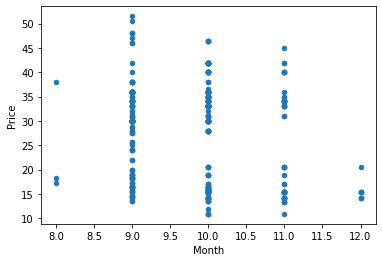

In [169]:
new_pumpkins.plot.scatter('Month','Price')

<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

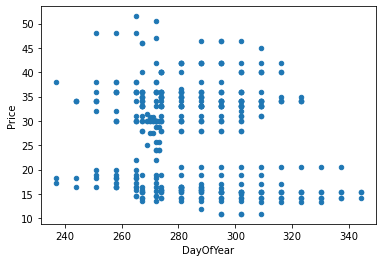

In [170]:
new_pumpkins.plot.scatter('DayOfYear','Price')

In [171]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077535
-0.16673322492745407


Inaonekana kama uhusiano ni mdogo sana, lakini kuna uhusiano mwingine muhimu zaidi - kwa sababu bei katika mchoro hapo juu zinaonekana kuwa na makundi tofauti tofauti. Hebu tufanye mchoro ambao utaonyesha aina mbalimbali za maboga:


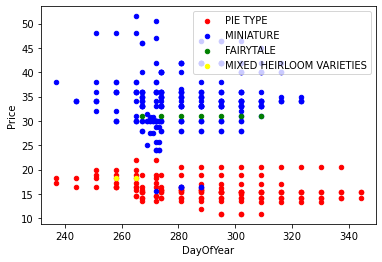

In [172]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    ax = new_pumpkins[new_pumpkins['Variety']==var].plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

<AxesSubplot:xlabel='Variety'>

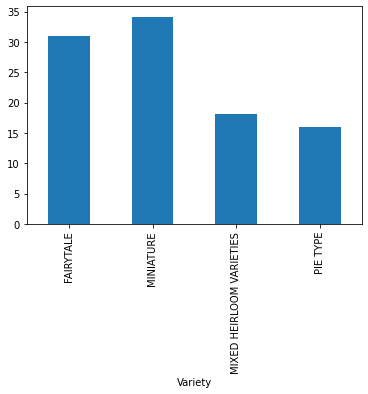

In [173]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

-0.2669192282197318


<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

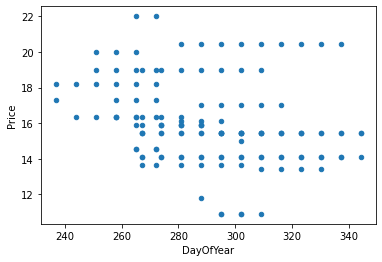

In [174]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))
pie_pumpkins.plot.scatter('DayOfYear','Price')

### Urejeleaji wa Mstari

Tutatumia Scikit Learn kufundisha mfano wa urejeleaji wa mstari:


In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [176]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')


Mean error: 2.77 (17.2%)


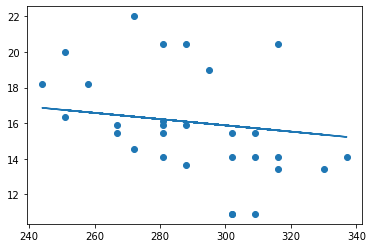

In [177]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

Mwelekeo wa mstari unaweza kuamuliwa kutoka kwa vigezo vya usawa wa mstari:


In [178]:
lin_reg.coef_, lin_reg.intercept_

(array([-0.01751876]), 21.133734359909326)

In [179]:
# Pumpkin price on programmer's day

lin_reg.predict([[256]])

array([16.64893156])

### Usawazishaji wa Polynomial

Wakati mwingine uhusiano kati ya vipengele na matokeo ni wa asili usio wa mstari. Kwa mfano, bei za maboga zinaweza kuwa juu wakati wa baridi (miezi=1,2), kisha zishuke wakati wa kiangazi (miezi=5-7), na kisha zipande tena. Usawazishaji wa mstari hauwezi kupata uhusiano huu kwa usahihi.

Katika hali hii, tunaweza kufikiria kuongeza vipengele vya ziada. Njia rahisi ni kutumia polinomiali kutoka kwa vipengele vya ingizo, ambayo itasababisha **usawazishaji wa polynomial**. Katika Scikit Learn, tunaweza kuhesabu kiotomatiki vipengele vya polynomial kwa kutumia pipelines:


Mean error: 2.73 (17.0%)
Model determination:  0.07639977655280217


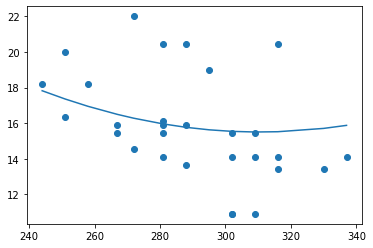

In [180]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_test,y_test)
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))

### Aina za usimbaji

Katika ulimwengu bora, tunataka kuwa na uwezo wa kutabiri bei za aina tofauti za maboga kwa kutumia modeli moja. Ili kuzingatia aina, tunahitaji kwanza kuibadilisha kuwa fomu ya nambari, au **kusimba**. Kuna njia kadhaa tunazoweza kutumia:

* Usimbaji rahisi wa nambari ambao utajenga jedwali la aina tofauti, kisha kubadilisha jina la aina kwa kiashiria katika jedwali hilo. Hii si wazo bora kwa urarukaji wa mstari, kwa sababu urarukaji wa mstari unazingatia thamani ya nambari ya kiashiria, na thamani ya nambari huenda isiwe na uhusiano wa moja kwa moja na bei.
* Usimbaji wa one-hot, ambao utabadilisha safu ya `Variety` kuwa safu 4 tofauti, moja kwa kila aina, ambayo itakuwa na 1 ikiwa safu husika ni ya aina fulani, na 0 vinginevyo.

Nambari iliyo hapa chini inaonyesha jinsi tunavyoweza kusimba aina kwa one-hot:


In [181]:
pd.get_dummies(new_pumpkins['Variety'])

FAIRYTALE  MINIATURE  MIXED HEIRLOOM VARIETIES  PIE TYPE
70            0          0                         0         1
71            0          0                         0         1
72            0          0                         0         1
73            0          0                         0         1
74            0          0                         0         1
...         ...        ...                       ...       ...
1738          0          1                         0         0
1739          0          1                         0         0
1740          0          1                         0         0
1741          0          1                         0         0
1742          0          1                         0         0

[415 rows x 4 columns]

### Urejeleaji wa Mstari kwenye Aina

Sasa tutatumia msimbo ule ule kama hapo juu, lakini badala ya `DayOfYear` tutatumia aina yetu iliyowekwa kwa njia ya one-hot-encoding kama ingizo:


In [182]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [183]:
def run_linear_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)

    pred = lin_reg.predict(X_test)

    mse = np.sqrt(mean_squared_error(y_test,pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

    score = lin_reg.score(X_train,y_train)
    print('Model determination: ', score)

run_linear_regression(X,y)

Mean error: 5.24 (19.7%)
Model determination:  0.774085281105197


Tunaweza pia kujaribu kutumia vipengele vingine kwa njia hiyo hiyo, na kuviunganisha na vipengele vya nambari, kama vile `Month` au `DayOfYear`:


In [184]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

run_linear_regression(X,y)

Mean error: 2.84 (10.5%)
Model determination:  0.9401096672643048


### Usajili wa Polynomial

Usajili wa polynomial unaweza pia kutumika na vipengele vya kategoria ambavyo vimekodishwa kwa njia ya one-hot. Msimbo wa kufundisha usajili wa polynomial kimsingi utakuwa sawa na tulivyoona hapo juu.


In [185]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.23 (8.25%)
Model determination:  0.9652870784724543



---

**Kanusho**:  
Hati hii imetafsiriwa kwa kutumia huduma ya tafsiri ya AI [Co-op Translator](https://github.com/Azure/co-op-translator). Ingawa tunajitahidi kwa usahihi, tafadhali fahamu kuwa tafsiri za kiotomatiki zinaweza kuwa na makosa au kutokuwa sahihi. Hati ya asili katika lugha yake ya awali inapaswa kuzingatiwa kama chanzo cha mamlaka. Kwa taarifa muhimu, inashauriwa kutumia huduma ya tafsiri ya kitaalamu ya binadamu. Hatutawajibika kwa maelewano mabaya au tafsiri zisizo sahihi zinazotokana na matumizi ya tafsiri hii.
